In [1]:
import pandas as pd

In [2]:
fec = pd.read_csv('./src/fec.csv')
fec

C:\Users\jjong\AppData\Local\Temp\ipykernel_4820\672728105.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  fec = pd.read_csv('./src/fec.csv')


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001726,C00500587,P20003281,"Perry, Rick","GORMAN, CHRIS D. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,5000.0,29-SEP-11,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,NaN,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,SA17A,751678
1001727,C00500587,P20003281,"Perry, Rick","DUFFY, DAVID A. MR.",INFO REQUESTED,XX,99999,DUFFY EQUIPMENT COMPANY INC.,BUSINESS OWNER,2500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678
1001728,C00500587,P20003281,"Perry, Rick","GRANE, BRYAN F. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,500.0,29-SEP-11,NaN,NaN,NaN,SA17A,751678
1001729,C00500587,P20003281,"Perry, Rick","TOLBERT, DARYL MR.",INFO REQUESTED,XX,99999,T.A.C.C.,LONGWALL MAINTENANCE FOREMAN,500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678


In [16]:
RvsO = fec[(fec['cand_nm'] == 'Obama, Barack') | (fec['cand_nm'] == 'Romney, Mitt')]
pt = RvsO.pivot_table('contb_receipt_amt', index='contbr_occupation', columns='cand_nm', aggfunc='sum')
pt

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
...,...,...
ZEPPOS AND ASSOCIATES,1000.0,NaN
ZONE MANAGER,135.0,NaN
ZOOKEEPER,35.0,NaN


In [4]:
fec['contbr_occupation'].nunique()

45073

<Axes: ylabel='contbr_occupation'>

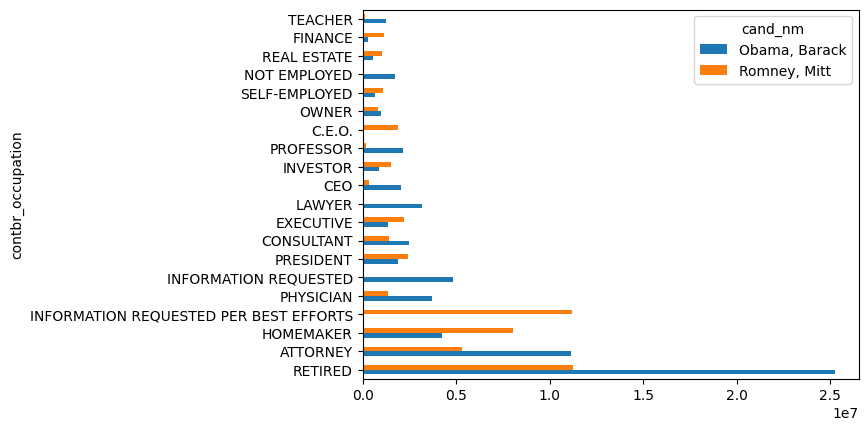

In [18]:
tmp = pt.sum(axis=1).sort_values(ascending=False)[:20].index
pt.loc[tmp].plot(kind='barh')

In [46]:
occu = pt.loc[tmp]
occu.reset_index(inplace=True)
occu['contbr_occupation'] = occu['contbr_occupation'].replace('C.E.O.', 'CEO')
occu.groupby('contbr_occupation').agg({'Obama, Barack': 'sum', 'Romney, Mitt': 'sum'})

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_occupation,,
ATTORNEY,11126932.97,5302578.82
CEO,2071474.79,2247242.03
CONSULTANT,2459812.71,1404576.94
EXECUTIVE,1355161.05,2230653.79
FINANCE,294031.40,1118567.25
HOMEMAKER,4243394.30,8037250.86
INFORMATION REQUESTED,4849801.96,0.00
INFORMATION REQUESTED PER BEST EFFORTS,0.00,11173374.84
INVESTOR,884133.00,1494725.12


<Axes: ylabel='contbr_occupation'>

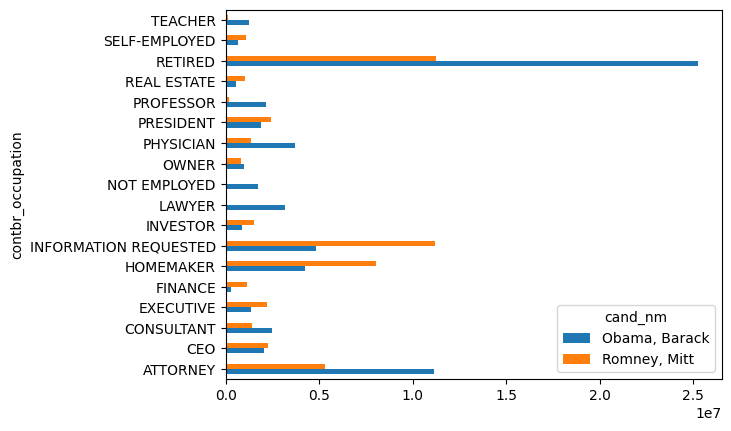

In [57]:
occu = pt.loc[tmp]
occu.reset_index(inplace=True)
occu['contbr_occupation'] = occu['contbr_occupation'].replace('C.E.O.', 'CEO')
occu['contbr_occupation'] = occu['contbr_occupation'].replace('INFORMATION REQUESTED PER BEST EFFORTS', 'INFORMATION REQUESTED')
occu = occu.groupby('contbr_occupation').sum()
occu.plot(kind='barh')